In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

A little bit about the dataset, CrimeRates.csv. 

In [4]:
crimes = pd.read_csv('CrimeRates.csv')

In [5]:
crimes.head()

,State,Year,Population,Violent Crime Rate,Murder Rate,Forcible Rape Rate,Robbery Rate,Aggraveted Assault Rate,Property Crime Rate,Burglary Rate,Larceny & Theft Rate,Motor Vehicle Theft Rate
0,Alaska,1960,226167,104.300003,10.2,20.799999,28.299999,45.099998,1544.900024,332.100006,970.500000,242.300003
1,Alaska,1961,234000,88.900002,11.5,13.200000,12.400000,51.700001,1540.599976,380.799988,950.000000,209.800003
2,Alaska,1962,246000,91.500000,4.5,18.700001,13.800000,54.500000,1564.599976,351.600006,985.400024,227.600006
3,Alaska,1963,248000,109.699997,6.5,14.900000,22.200001,66.099998,1952.800049,381.500000,1213.699951,357.700012
4,Alaska,1964,250000,150.000000,10.4,22.400000,21.200001,96.000000,2016.000000,443.600006,1218.400024,354.000000


The death penalty, or capital punishment, is defined as the infliction of death as a punishment for breaking criminal law. In the United States, the death penalty is usually applied for crimes that are considered especially horrible, such as murder, but is also used in cases of treason and large-scale drug trafficking.


Today's methods of capital punishment include:

* Lethal Injection 
* Hanging
* Gas Chamber 
* Firing Squad 
* Electrocution 

Capital punishmment has been a controversial topic for centuries. There are many arguments for and against capital punishment. I will not focus on expanding or debating the issue, but I will focus my attention on one reason someone may be in favor of capital punishment: **Deterrence**

In 2002 Hashem Dezhbakhsh, Paul H. Rubin, and Joanna M. Shepherd investigated how [capital punishment contributes to deterrence](https://cjlf.org/deathpenalty/DezRubShepDeterFinal.pdf) - if capital punishment deters future murders. 

# Analysis

The data ranges from 1960-2003. 
* Alaska abolished capital punishment in 1957
* Iowa abolished capital punishment in 1965
* Massachussettes abolished capital punishment in 1984
* Minnesota abolished capital punishment in 1911
* Michigan abolished capital punishment in 1846
* Maine abolished capital punishment in 1887
* Wisconsin abolished capital punishment in 1853

In [6]:
# DataFrame with only State, Year, and Murder Rate
murder_df = crimes[['State', 'Year', 'Murder Rate']]

In [7]:
# Producing DataFrame which has states: Alaska, Michigan, Minnesota, Maine, Wisconsin 
al_mi_mn_me_wi = crimes[(crimes['State'] == 'Alaska') | (crimes['State'] =='Michigan') | (crimes['State'] =='Minnesota') | (crimes['State'] =='Maine') | (crimes['State'] =='Wisconsin')]
control_df = al_mi_mn_me_wi[['State', 'Year', 'Murder Rate']]
control_df.head()

,State,Year,Murder Rate
0,Alaska,1960,10.2
1,Alaska,1961,11.5
2,Alaska,1962,4.5
3,Alaska,1963,6.5
4,Alaska,1964,10.4


In Furman v Georgia (1972) Supreme Court passed a de facto memoratorium on capital punishment. There are many years to work with, let's group then over an average of 2 years, focusing on 1960-1962; the furthest away we can get from 1972. 

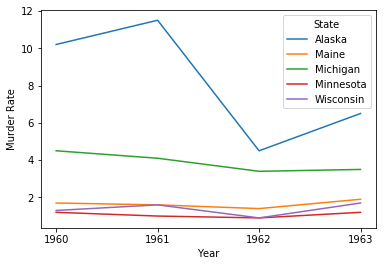

In [12]:
# Isolating control group through the years 1960-1963 inclusive 
control_1960_to_1963 = control_df[(control_df['Year'] >= 1960) & (control_df['Year'] <= 1963)].reset_index()

# Arrange columns by State, column entries are Murder Rates for those rates, row index as Year
df = control_1960_to_1963.pivot(
index = 'Year',
columns = 'State',
values = 'Murder Rate' ) 

ax = df.plot(xticks=df.index)
ylab = ax.set_ylabel('Murder Rate')

 The control group will be the states which began with no capital punishment, and never adopted capital punishment (from the dates the data was collected). 

State,Florida,Louisiana,Nevada,New Mexico,Texas
Year,,,,,
1986,11.7,12.8,12.6,11.5,13.5


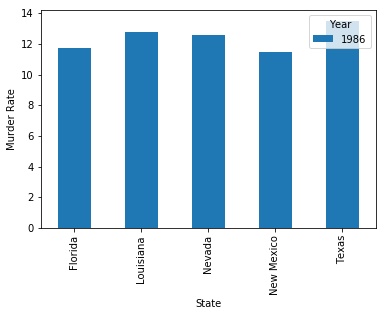

In [13]:
#Function that has input a year, and plots the n states with the highest murder rates of that year. 
def murderous(year, n):
    mask = murder_df[murder_df['Year'] == year]
    most_murderous = mask.nlargest(n, 'Murder Rate') 
    # Pivot function
    most_murderous_pivot = most_murderous.pivot(
        columns = 'State',
        index = 'Year',
        values = 'Murder Rate')
    ax = most_murderous_pivot.T.plot(kind = 'bar')
    ylab = ax.set_ylabel('Murder Rate')
    return most_murderous_pivot

# For example, let's look at the top 5 'most murderous' states in the year 1986
murderous(1986, 5)    
    


Out of interest, what are the 5 most murderous states and year?

In [14]:
murder_df.nlargest(5, 'Murder Rate')

,State,Year,Murder Rate
781,Louisiana,1993,20.299999
1428,Nevada,1980,20.000000
782,Louisiana,1994,19.799999
22,Alaska,1982,18.500000
408,Georgia,1972,18.500000


Some sources: https://legal-dictionary.thefreedictionary.com/Death-penalty

Identify control group, test group  
Clearly say what you will be comparing   
look before and after capital punishment introduced  
say a little bit about the history  
in the future will look at ecoonomic impact  
